In [1]:
from yelpapi import YelpAPI
import requests
import pandas as pd
import json
import sys
import re
import warnings
import matplotlib.patches as mpatches
warnings.filterwarnings('ignore')
from datetime import date
from shapely.geometry import Point
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors
current_date = date.today().strftime('%Y-%m-%d')

city = 'Fargo'
state = 'nd'

In [2]:
%run yelp_data_scrape.py fargo nd

In [3]:
df = pd.read_csv("./data/"+city+"_Restaurants_"+current_date+".csv")
df = df[['name', 'review_count', 'rating', 'transactions', 'price', 'phone', 'display_phone', 'display_address', 'latitude', 'longitude', 'foodtype']]
df.head()

,name,review_count,rating,transactions,price,phone,display_phone,display_address,latitude,longitude,foodtype
0,Mezzaluna,356,4.5,['delivery'],$$$,1.701365e+10,(701) 364-9479,"['309 Roberts St N', 'Fargo, ND 58102']",46.879410,-96.788710,newamerican
1,Brew Bird,111,4.5,['pickup'],$$,1.701205e+10,(701) 205-0238,"['30 N University Dr', 'Fargo, ND 58102']",46.877202,-96.798648,newamerican
2,Little Brother,12,5.0,['delivery'],NaN,1.701532e+10,(701) 532-1980,"['117 Broadway N', 'Fargo, ND 58102']",46.877707,-96.787376,asianfusion
3,The Tavern Grill - Fargo,102,4.0,['delivery'],NaN,1.701532e+10,(701) 532-0777,"['4504 32nd Ave S', 'Fargo, ND 58104']",46.832187,-96.863257,tradamerican
4,Maxwells Restaurant & Bar,123,4.5,['delivery'],$$$,1.701278e+10,(701) 277-9463,"['1380 9th St E', 'West Fargo, ND 58078']",46.860901,-96.883655,newamerican


Total Number of Restaurants in Fargo: 488


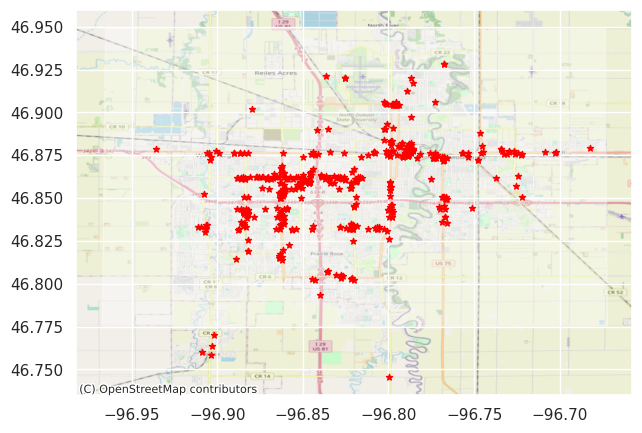

In [17]:
#Plot a map of Restaurants
geometry = [Point(xy) for xy in zip(df['longitude'],df['latitude'])]

wardlink = "./geodata/Fargo-Moorhead_Area-polygon.shp"

ward = gpd.read_file(wardlink, bbox=None, mask=None, rows=None)
geo_df = gpd.GeoDataFrame(geometry = geometry)

ward.crs = {'init':"epsg:4326"}
geo_df.crs = {'init':"epsg:4326"}

ax = ward.plot(alpha=0.35, color='#ffffff', zorder=1)
ax = geo_df.plot(ax = ax, markersize = 20, color = 'red',marker = '*',label = city, zorder=3)
ctx.add_basemap(ax, crs=geo_df.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
print("Total Number of Restaurants in "+city+": "+str(len(df)))
plt.show()

In [5]:
ratings = df.sort_values(['rating', 'review_count'], ascending=[False, False])
ratings = ratings[ratings['review_count'] != 0]
print("Top Ten highest rated restaurants in "+city+":")
ratings.head(10)

Top Ten highest rated restaurants in Fargo:


,name,review_count,rating,transactions,price,phone,display_phone,display_address,latitude,longitude,foodtype
13,GP’s Greek Kitchen,75,5.0,"['delivery', 'pickup']",$$,1.701640e+10,(701) 639-7232,"['2553 Kirsten Ln S', 'Ste 206', 'Fargo, ND 58...",46.832010,-96.821465,greek
84,Madina Cuisine,57,5.0,['delivery'],$,1.701235e+10,(701) 235-0504,"['2225 13th Ave S', 'Fargo, ND 58103']",46.862019,-96.817610,african
30,ThaiKota,39,5.0,['delivery'],NaN,1.701212e+10,(701) 212-4851,"['1201 1st Ave N', 'Fargo, ND 58102']",46.877716,-96.797468,thai
227,Tea and Crepe,30,5.0,"['delivery', 'pickup']",NaN,1.701541e+10,(701) 540-6737,"['72 Broadway N', 'Fargo, ND 58102']",46.876738,-96.787950,icecream
45,Newroz Kebab,19,5.0,"['delivery', 'pickup']",NaN,1.218228e+10,(218) 227-5019,"['2501 8th St S', 'Moorhead, MN 56560']",46.850661,-96.768806,kebab
155,Mehl's Gluten-Free Bakery,18,5.0,[],$$,1.701205e+10,(701) 205-4174,"['1404 33rd St S', 'Ste H', 'Fargo, ND 58103']",46.858765,-96.831940,cupcakes
152,Jay's Smokin' BBQ,17,5.0,['delivery'],$$,1.701478e+10,(701) 478-1112,"['1322 Main Ave', 'Fargo, ND 58103']",46.878791,-96.733997,tradamerican
2,Little Brother,12,5.0,['delivery'],NaN,1.701532e+10,(701) 532-1980,"['117 Broadway N', 'Fargo, ND 58102']",46.877707,-96.787376,asianfusion
230,Hi-Ho Burgers & Brews,8,5.0,['delivery'],$,1.218287e+10,(218) 287-2975,"['10 Center Ave E', 'Dilworth, MN 56529']",46.876820,-96.702270,burgers
25,Tati's Mediterranean Saveur,6,5.0,"['delivery', 'pickup']",NaN,1.701532e+10,(701) 532-4545,"['3150 Sheyenne St', 'Ste 170', 'West Fargo, N...",46.834110,-96.906160,lebanese


In [6]:
print("Top Ten lowest rated restaurants in "+city+":")
ratings.tail(10)

Top Ten lowest rated restaurants in Fargo:


,name,review_count,rating,transactions,price,phone,display_phone,display_address,latitude,longitude,foodtype
400,Casey's,2,1.0,['delivery'],NaN,1.701277e+10,(701) 277-4389,"['4405 45th St S', 'Fargo, ND 58104']",46.814130,-96.862301,pizza
402,Subway,2,1.0,[],$,1.701356e+10,(701) 356-0920,"['3757 55th Ave S', 'Fargo, ND 58104']",46.802265,-96.842661,sandwiches
415,Papa Johns Pizza,2,1.0,"['delivery', 'pickup']",NaN,1.701233e+10,(701) 232-7272,"['5675 26th Ave S', 'Ste 148', 'Fargo, ND 58104']",46.840844,-96.882088,pizza
313,New Gyro,1,1.0,[],NaN,NaN,NaN,"['855 45th St S', 'Ste A2', 'Fargo, ND 58103']",46.867755,-96.862778,food_court
318,Casey's,1,1.0,['delivery'],NaN,1.701315e+10,(701) 314-5860,"['3545 25th St S', 'Fargo, ND 58104']",46.824972,-96.820428,pizza
368,Sbc Deli,1,1.0,[],NaN,1.701373e+10,(701) 373-0028,"['122 23rd St S', 'Fargo, ND 58103']",46.874146,-96.816124,delis
416,Red River Lanes Bowling Center,1,1.0,[],NaN,1.701235e+10,(701) 235-1171,"['707 28th Ave N', 'Fargo, ND 58102']",46.912524,-96.789123,bowling
424,Wendy's,1,1.0,[],$,1.701239e+10,(701) 239-0356,"['311 13th Ave S', 'Fargo, ND 58102']",46.861127,-96.774954,burgers
483,Papa Johns Pizza,1,1.0,"['pickup', 'delivery']",$,1.701238e+10,(701) 237-9999,"['1100 19th Ave N', 'Unit N', 'Fargo, ND 58102']",46.904170,-96.795103,pizza
485,Subway,1,1.0,['delivery'],$,1.218234e+10,(218) 233-5972,"['201 34th St N', 'Moorhead, MN 56560']",46.877612,-96.726425,sandwiches


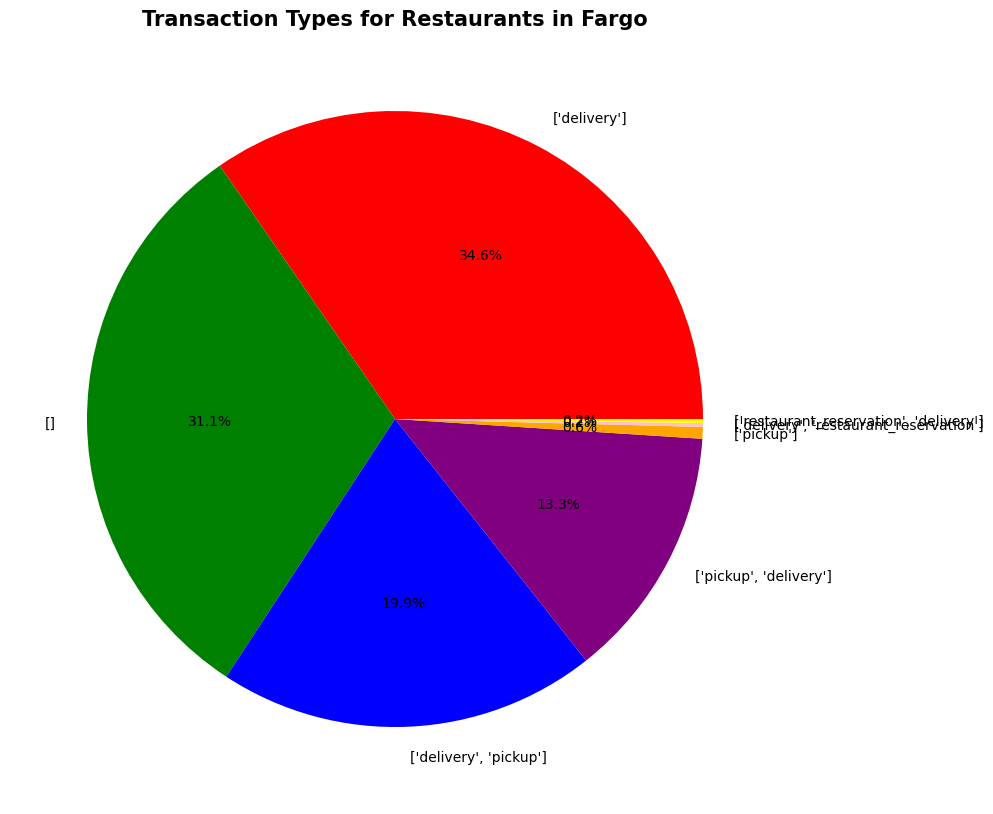

In [7]:
transactions_df = df["transactions"].value_counts()
transactions_df.plot.pie(figsize=(15, 10), autopct='%1.1f%%', colors=['red', 'green', 'blue', 'purple', 'orange', 'pink', 'yellow'])
plt.title("Transaction Types for Restaurants in "+city, fontdict={'size': 15, 'weight': 'bold'})
plt.ylabel("")
plt.show()

In [8]:
#convert food types
def map_foodtypes(foodtype):
    if foodtype == "restaurants":
        return 'miscellaneous'
    elif foodtype == "tacos":
        return 'mexican'
    elif foodtype == "burgers" or foodtype == "chicken_wings" or foodtype == "tradamerican" or foodtype == "newamerican":
        return 'american'
    if foodtype == "sandwiches" or foodtype == "soup":
        return 'soup_sandwich'
    elif foodtype == "breakfast_brunch":
        return 'breakfast'
    if foodtype == "sportsbars" or foodtype == "cocktailbars" or foodtype == "wine_bars":
        return 'bars'
    elif foodtype == "ramen":
        return 'noodles'    
    elif foodtype == "irish_pubs" or foodtype == "gastropubs":
        return 'pubs'  
    elif foodtype == "bagels":
        return 'bakeries'
    elif foodtype == "cupcakes" or foodtype == "donuts":
        return 'desserts' 
    elif foodtype == "asianfusion":
        return 'asian' 
    elif foodtype == "egyptian" or foodtype == "lebanese":
        return 'mideastern'
    elif foodtype == "cheesesteaks":
        return 'steak'  
    elif foodtype == "danceclubs" or foodtype == "nightclubs":
        return 'nightlife'     
    else:
        return foodtype

# apply the function to create the new column
df["foodtype"] = df["foodtype"].apply(map_foodtypes)

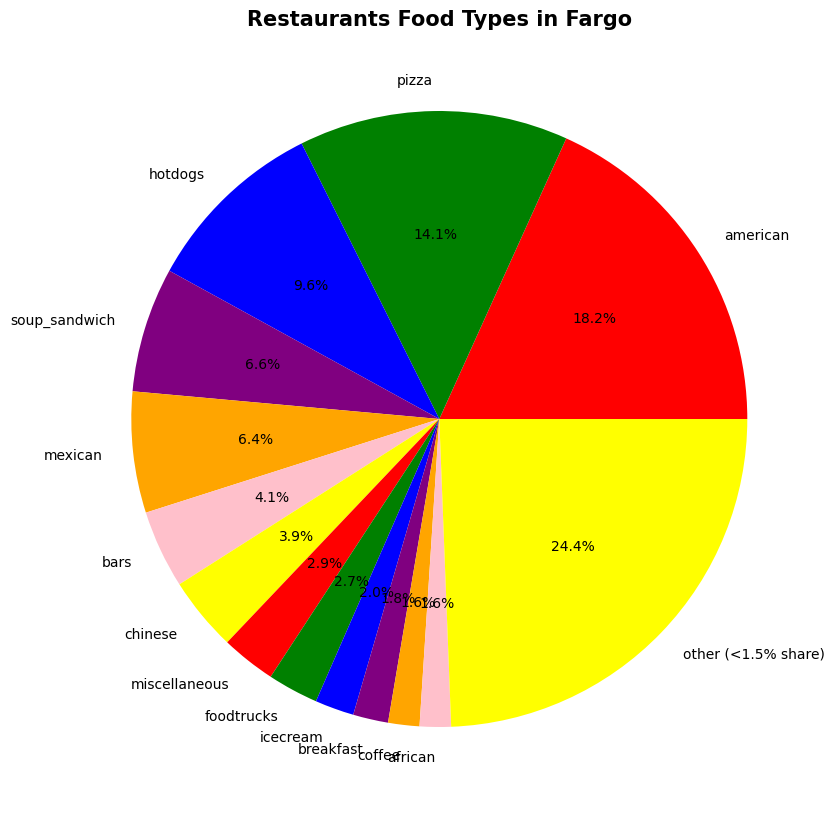

In [9]:
#create pie chart of food types
foodtype_count = df["foodtype"].value_counts()

# create new category that groups builders making up <2% of total
total = foodtype_count.sum()
threshold = 0.015

foodtype_percent = foodtype_count/foodtype_count.sum()
other_percent = foodtype_percent[foodtype_percent < threshold].sum()
foodtype_percent = foodtype_percent[foodtype_percent >= threshold]
foodtype_percent["other (<1.5% share)"] = other_percent

foodtype_percent.plot.pie(figsize=(15, 10), autopct='%1.1f%%', colors=['red', 'green', 'blue', 'purple', 'orange', 'pink', 'yellow'])
plt.title("Restaurants Food Types in "+city, fontdict={'size': 15, 'weight': 'bold'})
plt.ylabel("")
plt.show()

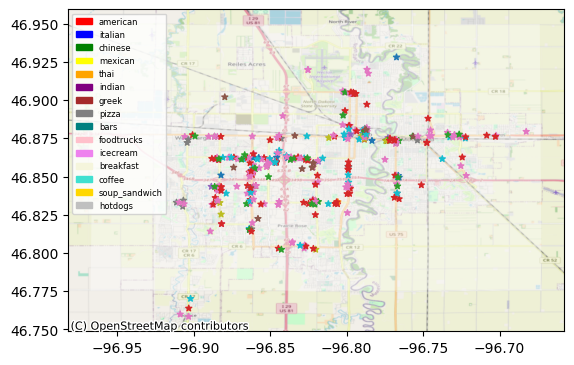

In [10]:
colormap = {
'american': 'red',
'italian': 'blue',
'chinese': 'green',
'mexican': 'yellow',
'thai': 'orange',
'indian': 'purple',
'greek': 'brown',
'pizza': 'gray',
'bars': 'teal',
'foodtrucks': 'pink',
'icecream': 'violet',
'breakfast': 'beige',
'coffee': 'turquoise',
'soup_sandwich': 'gold',
'hotdogs': 'silver'
}

geo_df['color'] = df['foodtype'].map(colormap)


legend_patches = [mpatches.Patch(color=color, label=food_type) for food_type, color in colormap.items()]

ax = ward.plot(alpha=0.35, color='#ffffff', zorder=1)
ax = geo_df.plot(ax=ax, markersize=20, column='color', marker='*', label=city, zorder=3)
ctx.add_basemap(ax, crs=geo_df.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
plt.legend(handles=legend_patches, loc="upper left", prop={'size': 6})
plt.show()

In [11]:
#convert price to word format
def map_price(price):
    if price == "$":
        return 'Low'
    elif price == "$$":
        return 'Medium'
    elif price == "$$$":
        return 'High'
    elif price == "$$$$":
        return 'Very High'
    elif price == "None":
        return 'Unlisted'
    else:
        return price

# apply the function to create the new column
df["price_val"] = df["price"].apply(map_price)
price_count = df["price_val"].value_counts()
price_count

Low          150
Medium       135
High           8
Very High      1
Name: price_val, dtype: int64

Note: This chart doesn't include restaurants where the price wasn't listed


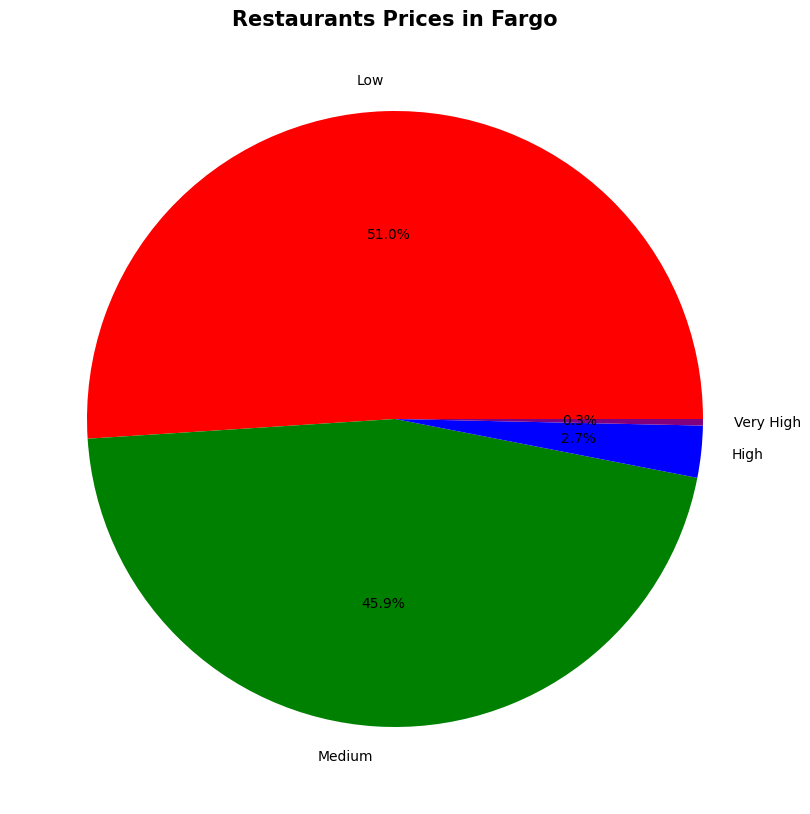

In [12]:
price_count.plot.pie(figsize=(15, 10), autopct='%1.1f%%', colors=['red', 'green', 'blue', 'purple', 'orange', 'pink', 'yellow'])
plt.title("Restaurants Prices in "+city, fontdict={'size': 15, 'weight': 'bold'})
plt.ylabel("")
print("Note: This chart doesn't include restaurants where the price wasn't listed")
plt.show()

In [13]:
# Group by foodtype and calculate the mean rating
average_rating = df.groupby('foodtype')['rating'].mean()
average_rating = pd.DataFrame(average_rating)
average_rating = pd.merge(average_rating, df.groupby('foodtype')['review_count'].sum(), on='foodtype')
average_rating = average_rating[average_rating['review_count'] != 0]
average_rating = average_rating.sort_values(['rating'], ascending=[False])

restaurant_count = df["foodtype"].value_counts()
restaurant_count = pd.DataFrame(restaurant_count)
restaurant_count

average_rating = pd.merge(average_rating, restaurant_count, left_index=True, right_index=True)
average_rating = average_rating.rename(columns={'foodtype': 'restaurant_count'}) 
average_rating

,rating,review_count,restaurant_count
asian,5.000000,12,1
kebab,5.000000,19,1
hotels,4.750000,4,2
greek,4.750000,122,2
desserts,4.500000,299,4
fishnchips,4.500000,325,3
thai,4.375000,228,4
indpak,4.333333,466,3
vietnamese,4.333333,224,3
bakeries,4.333333,299,3


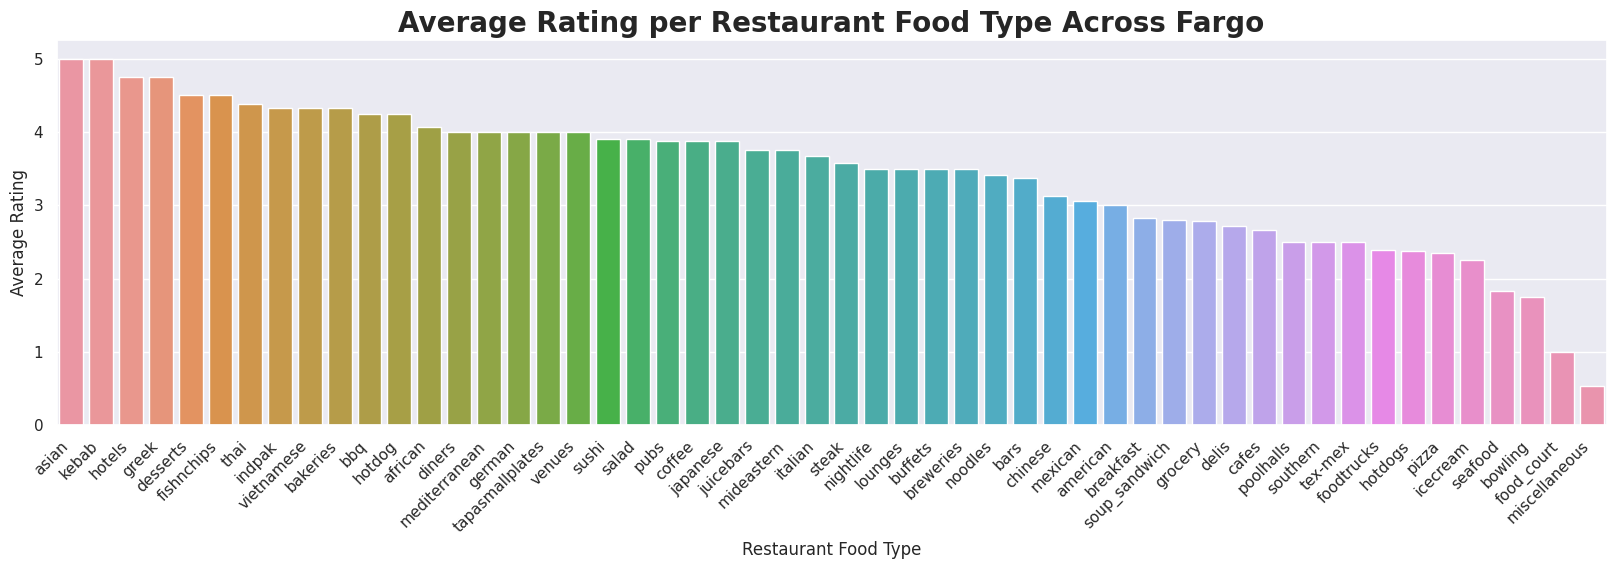

In [14]:
sns.set(rc={"figure.figsize":(20, 5)})
rating_barplot = sns.barplot(x = average_rating.index, y = 'rating', data = average_rating)
plt.xlabel('Restaurant Food Type')
plt.ylabel('Average Rating')
rating_barplot.set_xticklabels(rating_barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Average Rating per Restaurant Food Type Across '+ city, fontdict={'size': 20, 'weight': 'bold'})
plt.show()

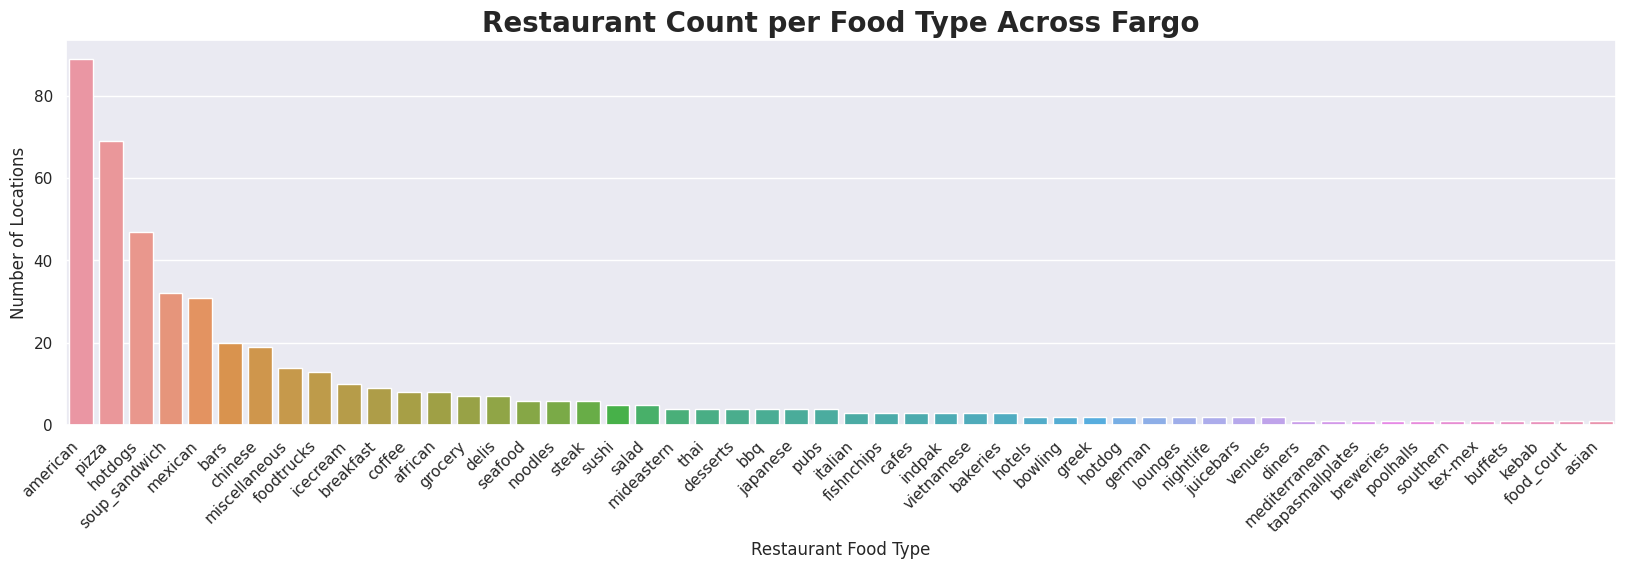

In [15]:
average_rating = average_rating.sort_values(['restaurant_count'], ascending=[False])
sns.set(rc={"figure.figsize":(20, 5)})
rating_barplot = sns.barplot(x = average_rating.index, y = 'restaurant_count', data = average_rating)
plt.xlabel('Restaurant Food Type')
plt.ylabel('Number of Locations')
rating_barplot.set_xticklabels(rating_barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Restaurant Count per Food Type Across '+ city, fontdict={'size': 20, 'weight': 'bold'})
plt.show()

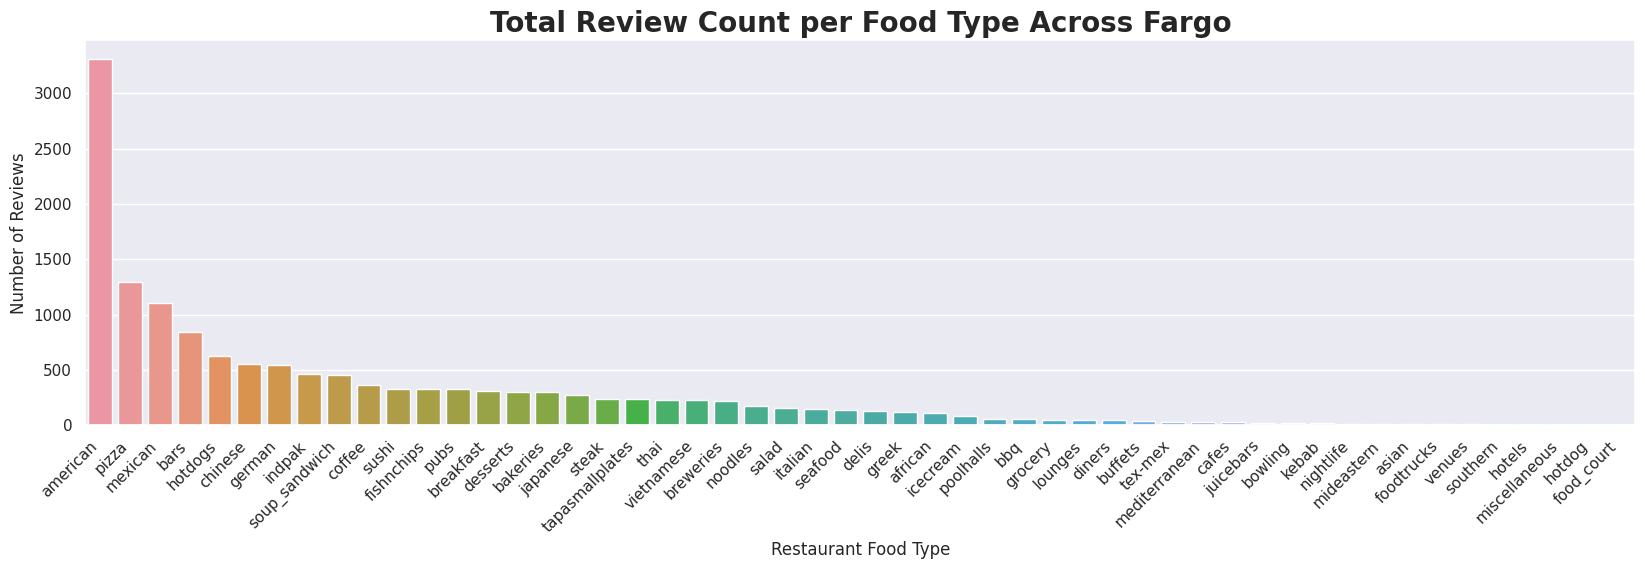

In [16]:
average_rating = average_rating.sort_values(['review_count'], ascending=[False])
sns.set(rc={"figure.figsize":(20, 5)})
rating_barplot = sns.barplot(x = average_rating.index, y = 'review_count', data = average_rating)
plt.xlabel('Restaurant Food Type')
plt.ylabel('Number of Reviews')
rating_barplot.set_xticklabels(rating_barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Total Review Count per Food Type Across '+ city, fontdict={'size': 20, 'weight': 'bold'})
plt.show()

In [18]:
df

,name,review_count,rating,transactions,price,phone,display_phone,display_address,latitude,longitude,foodtype,price_val
0,Mezzaluna,356,4.5,['delivery'],$$$,1.701365e+10,(701) 364-9479,"['309 Roberts St N', 'Fargo, ND 58102']",46.879410,-96.788710,american,High
1,Brew Bird,111,4.5,['pickup'],$$,1.701205e+10,(701) 205-0238,"['30 N University Dr', 'Fargo, ND 58102']",46.877202,-96.798648,american,Medium
2,Little Brother,12,5.0,['delivery'],NaN,1.701532e+10,(701) 532-1980,"['117 Broadway N', 'Fargo, ND 58102']",46.877707,-96.787376,asian,NaN
3,The Tavern Grill - Fargo,102,4.0,['delivery'],NaN,1.701532e+10,(701) 532-0777,"['4504 32nd Ave S', 'Fargo, ND 58104']",46.832187,-96.863257,american,NaN
4,Maxwells Restaurant & Bar,123,4.5,['delivery'],$$$,1.701278e+10,(701) 277-9463,"['1380 9th St E', 'West Fargo, ND 58078']",46.860901,-96.883655,american,High
...,...,...,...,...,...,...,...,...,...,...,...,...
483,Papa Johns Pizza,1,1.0,"['pickup', 'delivery']",$,1.701238e+10,(701) 237-9999,"['1100 19th Ave N', 'Unit N', 'Fargo, ND 58102']",46.904170,-96.795103,pizza,Low
484,Ils Wayport,0,0.0,[],NaN,1.701293e+10,(701) 293-0801,"['1220 19th Ave N', 'Fargo, ND 58102']",46.904247,-96.797379,miscellaneous,NaN
485,Subway,1,1.0,['delivery'],$,1.218234e+10,(218) 233-5972,"['201 34th St N', 'Moorhead, MN 56560']",46.877612,-96.726425,soup_sandwich,Low
486,Dairy Queen Grill & Chill,0,0.0,[],NaN,1.701532e+10,(701) 532-3082,"['7875 Jacks Way', 'Horace, ND 58047']",46.770194,-96.902107,icecream,NaN


In [24]:
df = df.sort_values(['price'], ascending=[False])
print("Top Ten most expensive restaurants in "+city+":")
df.head(10)

Top Ten most expensive restaurants in Fargo:


,name,review_count,rating,transactions,price,phone,display_phone,display_address,latitude,longitude,foodtype,price_val
259,Papa Murphy's,7,3.5,[],$$$$,1.701366e+10,(701) 365-8282,"['4501 15th Avenue South', 'Suite 111', 'Fargo...",46.858880,-96.863200,pizza,Very High
4,Maxwells Restaurant & Bar,123,4.5,['delivery'],$$$,1.701278e+10,(701) 277-9463,"['1380 9th St E', 'West Fargo, ND 58078']",46.860901,-96.883655,american,High
7,Rustica Eatery & Tavern,156,4.5,"['delivery', 'restaurant_reservation']",$$$,1.218228e+10,(218) 227-5388,"['315 Main Ave', 'Moorhead, MN 56560']",46.873564,-96.774261,soup_sandwich,High
58,Cork 'N Cleaver,57,2.5,['delivery'],$$$,1.701238e+10,(701) 237-6790,"['3301 S University Dr', 'Fargo, ND 58104']",46.830587,-96.801064,steak,High
66,Urban 42,37,3.0,['pickup'],$$$,1.701282e+10,(701) 281-7105,"['1635 42nd St S', 'Fargo, ND 58103']",46.856350,-96.852390,american,High
333,Taco John's,10,2.0,['delivery'],$$$,1.701232e+10,(701) 232-0551,"['2201 S 13th Ave', 'Fargo, ND 58103']",46.861950,-96.815730,mexican,High
287,Hornbacher's Foods,6,3.0,[],$$$,1.701280e+10,(701) 280-1999,"['1532 32nd Ave S', 'Ste 3', 'Fargo, ND 58103']",46.832104,-96.802655,grocery,High
0,Mezzaluna,356,4.5,['delivery'],$$$,1.701365e+10,(701) 364-9479,"['309 Roberts St N', 'Fargo, ND 58102']",46.879410,-96.788710,american,High
185,O'kelly's Tastes & Toddies,8,3.0,['delivery'],$$$,1.701277e+10,(701) 277-1880,"['3800 Main Ave', 'Fargo, ND 58103']",46.874910,-96.842810,bars,High
146,Silver Dollar Bar & The Flying Pig Grill,11,3.5,['delivery'],$$,1.701281e+10,(701) 281-0715,"['221 Sheyenne St', 'West Fargo, ND 58078']",46.874050,-96.903620,bars,Medium
